In [1]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from deepface import DeepFace

In [42]:
obrazek = cv2.imread('0029.jpg') # načítam obrazek
obrazek = cv2.cvtColor(obrazek, cv2.COLOR_BGR2RGB)  # konverze barev z BlueGreenRed na RedGreenB
## obrazek

## Zobrazení obrázku na plotu

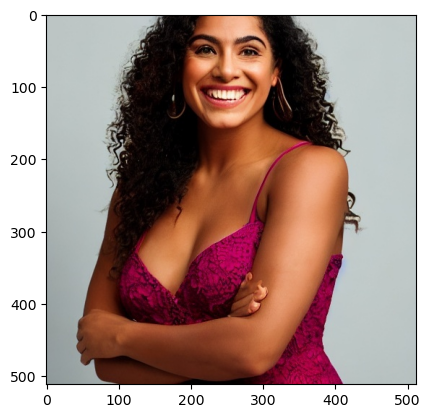

In [32]:
plt.imshow(obrazek)
## plt.show()

## Analýza obrázku

In [6]:
prediction = DeepFace.analyze(obrazek)

Action: race: 100%|██████████| 4/4 [00:15<00:00,  3.78s/it]   


## Výsledky analýzy

In [18]:
prediction

[{'emotion': {'angry': 2.0879147119987964e-25,
   'disgust': 0.0,
   'fear': 1.4959417280598364e-28,
   'happy': 100.0,
   'sad': 6.840047563925659e-20,
   'surprise': 1.547004100380758e-15,
   'neutral': 6.420906029092066e-07},
  'dominant_emotion': 'happy',
  'region': {'x': 176,
   'y': 0,
   'w': 151,
   'h': 151,
   'left_eye': (276, 52),
   'right_eye': (222, 48)},
  'face_confidence': 0.9,
  'age': 24,
  'gender': {'Woman': 99.94926452636719, 'Man': 0.05073615466244519},
  'dominant_gender': 'Woman',
  'race': {'asian': 5.294848176529895,
   'indian': 10.68707544726583,
   'black': 6.591327136238046,
   'white': 10.253152117321022,
   'middle eastern': 6.884786896990949,
   'latino hispanic': 60.288808363009},
  'dominant_race': 'latino hispanic'}]

##  Určení emocí z obrázku

In [19]:
predictions = [{prediction[0]['dominant_emotion'],prediction[0]['dominant_gender'],prediction[0]['dominant_race']}]

In [20]:
predictions

[{'Woman', 'happy', 'latino hispanic'}]

In [21]:
oblicej = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cernobily = cv2.cvtColor(obrazek, cv2.COLOR_BGR2GRAY)

## Vyhledavaní obličeje na obrázku a označení čtvercem

# Zobrazení obrázku v černobílém formátu

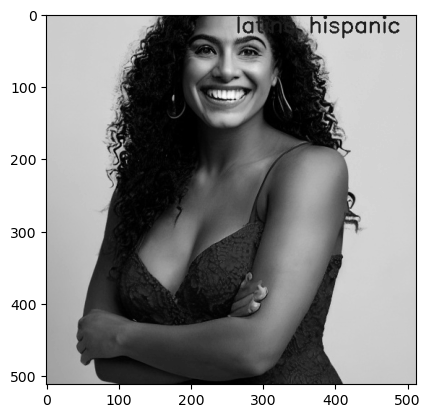

In [22]:
plt.imshow(cernobily, cmap='gray')

## Vyhledavame obličej a oramujeme

In [46]:
face = oblicej.detectMultiScale(cernobily, 1.1, 4)
# scaleFactor=1.3: Určuje, jak moc se velikost obrázku zmenšuje při každém kroku. Nižší hodnota znamená přesnější, ale pomalejší detekci.
# minNeighbors=6: Kolik překrytí musí mít detekce, aby byl výsledek považován za platný. Vyšší číslo = méně falešných poplachů, ale může vynechat slabě detekované obličeje.
# Kreslime rameček
for(x, y, w, h) in face:
    cv2.rectangle(obrazek, (x, y), (x+w, y+h), (255, 0, 0), 2)

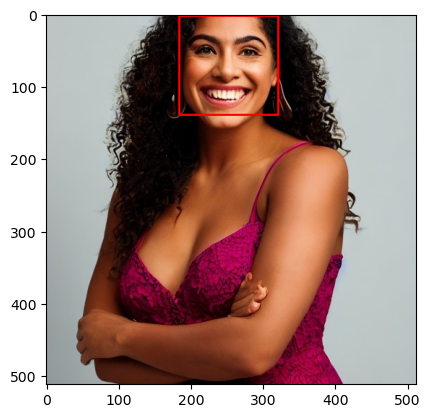

In [47]:
plt.imshow(obrazek)

## Nadpis emoce

In [14]:
obrazek.shape[2]

3

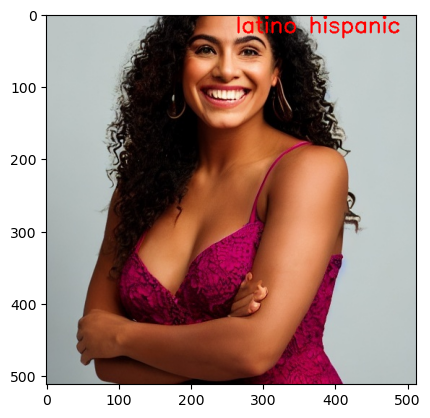

In [15]:
font = cv2.FONT_ITALIC
cv2.putText(obrazek, prediction[0]['dominant_race'], (obrazek.shape[1] - 250, 25), font, 1, (255, 0, 0), 2, cv2.LINE_4)
plt.imshow(obrazek)